In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [3]:
customers = pd.read_csv("CUSTOMERS.csv")
geo = pd.read_csv("GEO_LOCATION.csv")
order_items = pd.read_csv("ORDER_ITEMS.csv")
payments = pd.read_csv("ORDER_PAYMENTS.csv")
reviews = pd.read_csv("ORDER_REVIEW_RATINGS.csv")
orders = pd.read_csv("ORDERS.csv")
products = pd.read_csv("PRODUCTS.csv")
sellers = pd.read_csv("SELLERS.csv")


In [4]:
customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [5]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [6]:
order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [7]:
print("Customers:", customers.shape)
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Payments:", payments.shape)
print("Products:", products.shape)


Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
Payments: (103886, 5)
Products: (32951, 9)


In [10]:
### Table Relationships

#- customers → customer_id
#- orders → order_id, customer_id
#- order_items → order_id, product_id, seller_id
#- payments → order_id
#- reviews → order_id
#- products → product_id
###- sellers → seller_id ###


In [11]:
orders.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


In [13]:
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_month'] = orders['order_purchase_timestamp'].dt.month


In [14]:
order_data = orders.merge(order_items, on='order_id', how='inner')


In [15]:
order_data = order_data.merge(products, on='product_id', how='left')


In [16]:
order_data = order_data.merge(payments, on='order_id', how='left')


In [17]:
order_data.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_month,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017,10,...,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017,10,...,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017,10,...,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018,7,...,178.0,1.0,400.0,19.0,13.0,19.0,1.0,UPI,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018,8,...,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12


In [18]:
order_data['revenue'] = order_data['price'] + order_data['freight_value']


In [19]:
order_data['revenue'].sum()


np.float64(16566687.309999999)

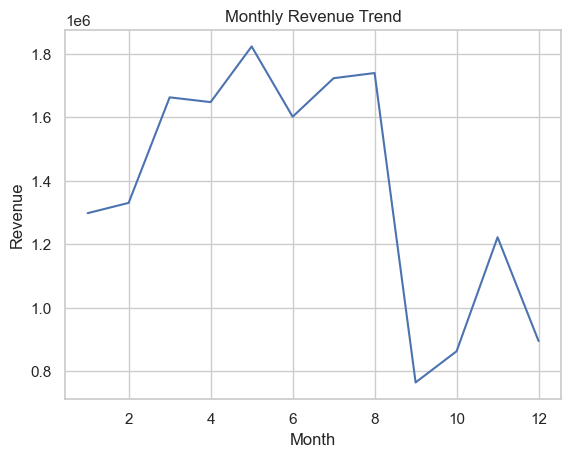

In [20]:
monthly_revenue = order_data.groupby('order_month')['revenue'].sum()

plt.figure()
monthly_revenue.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [21]:
top_products = (
    order_data.groupby('product_id')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


product_id
bb50f2e236e5eea0100680137654686c    72470.19
d1c427060a0f73f6b889a5c7c61f2ac4    63846.01
6cdd53843498f92890544667809f1595    60229.82
d6160fb7873f184099d9bc95e30376af    58608.48
99a4788cb24856965c36a24e339b6058    54936.19
3dd2a17168ec895c781a9191c1e95ad7    48913.68
25c38557cf793876c5abdd5931f922db    46466.21
aca2eb7d00ea1a7b8ebd4e68314663af    45522.32
5f504b3a1c75b73d6151be81eb05bdc9    41725.81
53b36df67ebb7c41585e8d54d6772e08    40467.30
Name: revenue, dtype: float64

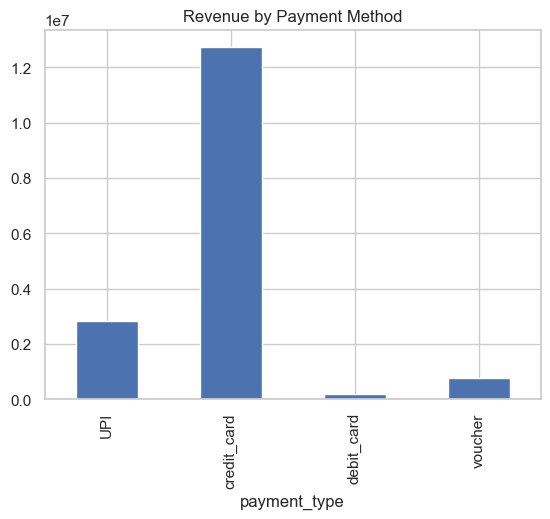

In [22]:
payment_type_revenue = order_data.groupby('payment_type')['revenue'].sum()

payment_type_revenue.plot(kind='bar')
plt.title("Revenue by Payment Method")
plt.show()


In [23]:
customer_revenue = (
    order_data.groupby('customer_id')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

customer_revenue


customer_id
1617b1357756262bfa56ab541c47bc16    13664.08
9af2372a1e49340278e7c1ef8d749f34    13281.71
de832e8dbb1f588a47013e53feaa67cc    11111.40
63b964e79dee32a3587651701a2b8dbf    10553.28
6f241d5bbb142b6f764387c8c270645a    10055.22
926b6a6fb8b6081e00b335edaf578d35     8389.52
eb7a157e8da9c488cd4ddc48711f1097     8068.88
f959b7bc834045511217e6410985963f     8030.46
d1ea705f2fdd8f98eff86c2691652e60     7413.70
ec5b2ba62e574342386871631fafd3fc     7274.88
Name: revenue, dtype: float64

In [24]:
## Key Insights

#1. Revenue shows clear monthly seasonality.
#2. A small number of products contribute disproportionately to total revenue.
#3. Certain payment methods dominate transactions.
#4. High-value customers present opportunities for retention strategies.


In [ ]:
## Conclusion

#This project demonstrates end-to-end E-Commerce data analysis using Python.
#It includes data loading, cleaning, merging multiple tables, feature engineering,
#exploratory data analysis, and business insight generation.
